# Определение перспективного тарифа для телеком-компании

***Описание проекта***

В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

***Описание тарифов***

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

**Примечание:**

`«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.`

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
#Импортируем необходимые для работы библиотеки

In [2]:
try:
    calls = pd.read_csv('C:\practicum\calls.csv')
#чтение файла в случае локальной работы
except:
    calls = pd.read_csv('/datasets/calls.csv')
#чтение файла в случае работы онланй в среде практикума
display(calls.info(),
        calls.head(),
        calls.isna().sum())    
#присваиваем переменным таблицы и выводим на экран информацию по ним

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


id           0
call_date    0
duration     0
user_id      0
dtype: int64

Даннай таблица состоит из 4 столбцов и 202607 строк, в ней нет пропусков, типы данных в таблице: строковые(2), целочисленные(1), вещественные(1). Таблица содержит информацию о звонках:
+ id — уникальный номер звонка
+ call_date — дата звонка
+ duration — длительность звонка в минутах
+ user_id — идентификатор пользователя, сделавшего звонок

In [3]:
try:
    internet = pd.read_csv('C:\practicum\internet.csv')
#чтение файла в случае локальной работы
except:
    internet = pd.read_csv('/datasets/internet.csv')
#чтение файла в случае работы онланй в среде практикума
display(internet.info(),
        internet.head(),
        internet.isna().sum())
#присваиваем переменным таблицы и выводим на экран информацию по ним

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Даннай таблица состоит из 5 столбцов и 149396 строк, в ней нет пропусков, типы данных в таблице: строковые(2), целочисленные(2), вещественные(1). Таблица содержит информацию об интернет-сессиях:
+ id — уникальный номер сессии
+ mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
+ session_date — дата интернет-сессии
+ user_id — идентификатор пользователя

In [4]:
try:
    messages = pd.read_csv('C:\practicum\messages.csv')
#чтение файла в случае локальной работы
except:
    messages = pd.read_csv('/datasets/messages.csv')
#чтение файла в случае работы онланй в среде практикума
display(messages.info(),
        messages.head(),
        messages.isna().sum())
#присваиваем переменным таблицы и выводим на экран информацию по ним

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


id              0
message_date    0
user_id         0
dtype: int64

Даннай таблица состоит из 3 столбцов и 123036 строк, в ней нет пропусков, типы данных в таблице: строковые(2), целочисленные(1). Таблица содержит информацию о сообщениях:
+ id — уникальный номер сообщения
+ message_date — дата сообщения
+ user_id — идентификатор пользователя, отправившего сообщение

In [5]:
try:
    tariffs = pd.read_csv('C:\practicum/tariffs.csv')
#чтение файла в случае локальной работы
except:
    tariffs = pd.read_csv('/datasets/tariffs.csv')
#чтение файла в случае работы онланй в среде практикума
display(tariffs.info(),
        tariffs.head(),
        tariffs.isna().sum())
#присваиваем переменным таблицы и выводим на экран информацию по ним

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

Даннай таблица состоит из 8 столбцов и 2 строк, в ней нет пропусков, типы данных в таблице: строковые(1), целочисленные(7). Таблица содержит информацию о тарифах:
+ tariff_name — название тарифа
+ rub_monthly_fee — ежемесячная абонентская плата в рублях
+ minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
+ messages_included — количество сообщений в месяц, включённых в абонентскую плату
+ mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
+ rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
+ rub_per_message — стоимость отправки сообщения сверх тарифного пакета
+ rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [6]:
try:
    users = pd.read_csv('C:\practicum/users.csv')
#чтение файла в случае локальной работы
except:
    users = pd.read_csv('/datasets/users.csv')
#чтение файла в случае работы онланй в среде практикума
display(users.info(),
        users.head(),
        users.isna().sum())
#присваиваем переменным таблицы и выводим на экран информацию по ним

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Даннай таблица состоит из 8 столбцов и 500 строк, есть пропуски в столбце 'churn_date', типы данных в таблице: строковые(6), целочисленные(2). Таблица содержит информацию о пользователях:
+ user_id — уникальный идентификатор пользователя
+ first_name — имя пользователя
+ last_name — фамилия пользователя
+ age — возраст пользователя (годы)
+ reg_date — дата подключения тарифа (день, месяц, год)
+ churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
+ city — город проживания пользователя
+ tarif — название тарифного плана

## **Вывод**
Мы прочитали 5 файлов CSV которые содержат таблицы с данными. В данных нет пропусков, за исключением таблицы **users**, в ней в столбце ***churn_date*** всего 38 значений, остальные 462 значения NAN. Нам известно что, это дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных).




# Шаг 2. Подготовьте данные


## Приведите данные к нужным типам¶

In [7]:
#приводим данные во временной тип из строкового
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d')

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')

users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y.%m.%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')


Мы привели данные к временному типу, так как раньше все столбцы, в которых содержались значения со временем, были в строковом формате.

## Найдите и исправьте ошибки в данных, если они есть.

In [8]:
def unique_df(df):
    for column in df.columns: display(column, df[column].unique())
# функция для просмотра уникальных значений в каждоим столбце выбранной таблицы
unique_df(calls)
unique_df(internet)
unique_df(messages)
unique_df(users)
unique_df(tariffs)
#применение функции

'id'

array(['1000_0', '1000_1', '1000_2', ..., '1499_217', '1499_218',
       '1499_219'], dtype=object)

'call_date'

array(['2018-07-25T00:00:00.000000000', '2018-08-17T00:00:00.000000000',
       '2018-06-11T00:00:00.000000000', '2018-09-21T00:00:00.000000000',
       '2018-12-15T00:00:00.000000000', '2018-11-02T00:00:00.000000000',
       '2018-10-18T00:00:00.000000000', '2018-08-22T00:00:00.000000000',
       '2018-09-15T00:00:00.000000000', '2018-08-15T00:00:00.000000000',
       '2018-05-28T00:00:00.000000000', '2018-07-05T00:00:00.000000000',
       '2018-09-29T00:00:00.000000000', '2018-12-11T00:00:00.000000000',
       '2018-07-27T00:00:00.000000000', '2018-08-11T00:00:00.000000000',
       '2018-08-02T00:00:00.000000000', '2018-06-15T00:00:00.000000000',
       '2018-12-04T00:00:00.000000000', '2018-08-20T00:00:00.000000000',
       '2018-09-25T00:00:00.000000000', '2018-07-21T00:00:00.000000000',
       '2018-08-27T00:00:00.000000000', '2018-08-25T00:00:00.000000000',
       '2018-12-12T00:00:00.000000000', '2018-07-19T00:00:00.000000000',
       '2018-11-14T00:00:00.000000000', '2018-12-26

'duration'

array([ 0.  ,  2.85, 13.8 , ..., 24.36, 24.5 , 26.9 ])

'user_id'

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,
       1100, 1101, 1102, 1103, 1104, 1105, 1107, 1108, 1109, 1110, 1111,
       1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
       1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132, 1133, 1134,
       1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145,
       1146, 1147, 1148, 1149, 1150, 1151, 1152, 11

'Unnamed: 0'

array([     0,      1,      2, ..., 149393, 149394, 149395])

'id'

array(['1000_0', '1000_1', '1000_2', ..., '1499_154', '1499_155',
       '1499_156'], dtype=object)

'mb_used'

array([ 112.95, 1052.81, 1197.26, ...,  460.75,  247.59,   23.72])

'session_date'

array(['2018-11-25T00:00:00.000000000', '2018-09-07T00:00:00.000000000',
       '2018-06-25T00:00:00.000000000', '2018-08-22T00:00:00.000000000',
       '2018-09-24T00:00:00.000000000', '2018-10-02T00:00:00.000000000',
       '2018-07-11T00:00:00.000000000', '2018-10-08T00:00:00.000000000',
       '2018-09-03T00:00:00.000000000', '2018-09-27T00:00:00.000000000',
       '2018-08-28T00:00:00.000000000', '2018-06-20T00:00:00.000000000',
       '2018-08-09T00:00:00.000000000', '2018-08-11T00:00:00.000000000',
       '2018-07-21T00:00:00.000000000', '2018-06-09T00:00:00.000000000',
       '2018-06-03T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-11-28T00:00:00.000000000', '2018-08-20T00:00:00.000000000',
       '2018-12-06T00:00:00.000000000', '2018-07-02T00:00:00.000000000',
       '2018-10-19T00:00:00.000000000', '2018-10-30T00:00:00.000000000',
       '2018-06-17T00:00:00.000000000', '2018-11-06T00:00:00.000000000',
       '2018-09-14T00:00:00.000000000', '2018-11-15

'user_id'

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132,
       1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 11

'id'

array(['1000_0', '1000_1', '1000_2', ..., '1499_181', '1499_182',
       '1499_183'], dtype=object)

'message_date'

array(['2018-06-27T00:00:00.000000000', '2018-10-08T00:00:00.000000000',
       '2018-08-04T00:00:00.000000000', '2018-06-16T00:00:00.000000000',
       '2018-12-05T00:00:00.000000000', '2018-06-20T00:00:00.000000000',
       '2018-11-19T00:00:00.000000000', '2018-10-29T00:00:00.000000000',
       '2018-06-25T00:00:00.000000000', '2018-12-18T00:00:00.000000000',
       '2018-05-30T00:00:00.000000000', '2018-07-06T00:00:00.000000000',
       '2018-08-20T00:00:00.000000000', '2018-10-30T00:00:00.000000000',
       '2018-09-14T00:00:00.000000000', '2018-08-28T00:00:00.000000000',
       '2018-06-29T00:00:00.000000000', '2018-07-07T00:00:00.000000000',
       '2018-05-29T00:00:00.000000000', '2018-05-28T00:00:00.000000000',
       '2018-08-15T00:00:00.000000000', '2018-07-29T00:00:00.000000000',
       '2018-12-07T00:00:00.000000000', '2018-12-25T00:00:00.000000000',
       '2018-10-31T00:00:00.000000000', '2018-07-30T00:00:00.000000000',
       '2018-11-05T00:00:00.000000000', '2018-12-15

'user_id'

array([1000, 1002, 1003, 1004, 1005, 1007, 1008, 1009, 1011, 1012, 1013,
       1014, 1015, 1016, 1018, 1019, 1020, 1021, 1022, 1023, 1025, 1026,
       1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037,
       1038, 1039, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1050,
       1051, 1052, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062,
       1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074,
       1075, 1076, 1077, 1079, 1080, 1081, 1082, 1083, 1084, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1096, 1097, 1098, 1099,
       1100, 1102, 1103, 1104, 1105, 1106, 1108, 1109, 1110, 1111, 1112,
       1113, 1115, 1119, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1130,
       1131, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1154, 1155, 1156,
       1158, 1159, 1160, 1161, 1163, 1164, 1165, 1166, 1167, 1168, 1169,
       1170, 1171, 1172, 1173, 1174, 1176, 1178, 11

'user_id'

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 11

'age'

array([52, 41, 59, 23, 68, 67, 21, 65, 63, 24, 26, 44, 38, 36, 64, 58, 73,
       71, 61, 72, 42, 56, 32, 62, 20, 51, 28, 66, 31, 37, 47, 40, 69, 48,
       33, 39, 43, 46, 45, 55, 53, 34, 49, 25, 18, 70, 50, 19, 54, 60, 29,
       27, 74, 22, 30, 75, 57, 35])

'churn_date'

array([                          'NaT', '2018-10-05T00:00:00.000000000',
       '2018-12-18T00:00:00.000000000', '2018-11-21T00:00:00.000000000',
       '2018-10-03T00:00:00.000000000', '2018-10-14T00:00:00.000000000',
       '2018-12-09T00:00:00.000000000', '2018-12-11T00:00:00.000000000',
       '2018-12-26T00:00:00.000000000', '2018-08-31T00:00:00.000000000',
       '2018-12-03T00:00:00.000000000', '2018-12-23T00:00:00.000000000',
       '2018-11-07T00:00:00.000000000', '2018-12-16T00:00:00.000000000',
       '2018-12-20T00:00:00.000000000', '2018-11-30T00:00:00.000000000',
       '2018-12-21T00:00:00.000000000', '2018-08-17T00:00:00.000000000',
       '2018-09-02T00:00:00.000000000', '2018-10-04T00:00:00.000000000',
       '2018-11-13T00:00:00.000000000', '2018-11-22T00:00:00.000000000',
       '2018-10-28T00:00:00.000000000', '2018-11-26T00:00:00.000000000',
       '2018-11-27T00:00:00.000000000', '2018-11-16T00:00:00.000000000',
       '2018-10-27T00:00:00.000000000', '2018-12-30

'city'

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

'first_name'

array(['Рафаил', 'Иван', 'Евгений', 'Белла', 'Татьяна', 'Афанасий',
       'Леонид', 'Юна', 'Рустэм', 'Василиса', 'Эдуард', 'Веселина',
       'Варлам', 'Борис', 'Яков', 'Рузана', 'Марица', 'Мария', 'Матвей',
       'Игнатий', 'Тала', 'Святослав', 'Людмила', 'Иулиан', 'Владислав',
       'Рустем', 'Алексей', 'Мариетта', 'Лаврентий', 'Инна', 'Лия',
       'Розалия', 'Анжелика', 'Изольда', 'Агнесса', 'Юрий', 'Михаил',
       'Константин', 'Марианна', 'Иннокентий', 'Джемма', 'Екатерина',
       'Милица', 'Лола', 'Габриель', 'Кристина', 'Павел', 'Ренальд',
       'Луиза', 'Радислав', 'Динара', 'Лукий', 'Глеб', 'Тамара',
       'Александр', 'Таира', 'Роза', 'Исак', 'Юзефа', 'Ким', 'Гордей',
       'Эльза', 'Гектор', 'Андрей', 'Рафаэль', 'Фёдор', 'Харитон',
       'Еремей', 'Всеволод', 'Софья', 'Авксентий', 'Виолетта', 'Ириней',
       'Гелена', 'Ксения', 'Вера', 'Вениамин', 'Вероника', 'Даниэла',
       'Алла', 'Элеонора', 'Аюна', 'Руслан', 'Онисим', 'Марта', 'Эльвира',
       'Габриэль', '

'last_name'

array(['Верещагин', 'Ежов', 'Абрамович', 'Белякова', 'Авдеенко', 'Горлов',
       'Ермолаев', 'Березина', 'Пономарёв', 'Блинова', 'Кононов',
       'Алёшко', 'Соловьев', 'Андреенко', 'Акинфьев', 'Алюшина',
       'Сазонова', 'Аленникова', 'Золотов', 'Круглов', 'Костина',
       'Тихонов', 'Трофимова', 'Мельникова', 'Антипов', 'Акинин',
       'Бородин', 'Авдеев', 'Евсеев', 'Селезнев', 'Русанова', 'Тимофеев',
       'Игнатьева', 'Бабушкина', 'Бондарев', 'Аракина', 'Андропова',
       'Архипова', 'Денисова', 'Одинцов', 'Кравцов', 'Добрынин',
       'Родионова', 'Рябов', 'Карасева', 'Александрова', 'Меркулова',
       'Мясникова', 'Ларин', 'Аничкина', 'Сомова', 'Панов', 'Фёдоров',
       'Платонова', 'Артемьев', 'Дьячкова', 'Глушков', 'Свиридов',
       'Рудаков', 'Ситникова', 'Коршунов', 'Климова', 'Алфеева',
       'Игнатова', 'Малахов', 'Абашкина', 'Демьянов', 'Кочетов',
       'Селиванова', 'Чумаков', 'Андрейкин', 'Павловский', 'Никулин',
       'Шарапов', 'Кольцова', 'Литвинов', 'Авр

'reg_date'

array(['2018-05-25T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-06-17T00:00:00.000000000', '2018-08-17T00:00:00.000000000',
       '2018-05-14T00:00:00.000000000', '2018-01-25T00:00:00.000000000',
       '2018-02-26T00:00:00.000000000', '2018-04-19T00:00:00.000000000',
       '2018-12-19T00:00:00.000000000', '2018-03-22T00:00:00.000000000',
       '2018-08-05T00:00:00.000000000', '2018-03-19T00:00:00.000000000',
       '2018-03-28T00:00:00.000000000', '2018-11-14T00:00:00.000000000',
       '2018-05-15T00:00:00.000000000', '2018-04-30T00:00:00.000000000',
       '2018-11-21T00:00:00.000000000', '2018-05-22T00:00:00.000000000',
       '2018-04-01T00:00:00.000000000', '2018-05-16T00:00:00.000000000',
       '2018-10-22T00:00:00.000000000', '2018-04-26T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-10-31T00:00:00.000000000',
       '2018-03-15T00:00:00.000000000', '2018-10-06T00:00:00.000000000',
       '2018-04-10T00:00:00.000000000', '2018-10-02

'tariff'

array(['ultra', 'smart'], dtype=object)

'messages_included'

array([  50, 1000])

'mb_per_month_included'

array([15360, 30720])

'minutes_included'

array([ 500, 3000])

'rub_monthly_fee'

array([ 550, 1950])

'rub_per_gb'

array([200, 150])

'rub_per_message'

array([3, 1])

'rub_per_minute'

array([3, 1])

'tariff_name'

array(['smart', 'ultra'], dtype=object)

Мы не нашли ошибок в предоставленных данных, однако по условиям проекта, каждый звонок округляется до целых минут, даже если он длился 1 секунду. Веб-трафик округляется с мегабайт до гигабайт, при этом занчения для веб-трафика берутся за месяц. 
Далее округлим значения в таблице calls, столбца duration и значение в таблице internet столбца mb_used.

## Посчитайте для каждого пользователя:
+ количество сделанных звонков и израсходованных минут разговора по месяцам;
+ количество отправленных сообщений по месяцам;
+ объем израсходованного интернет-трафика по месяцам;
+ помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [9]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month
#добавляем столбец со значением месяца в выбранные таблицы

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Лучше всего использовать месяцы в формате дат, например `yyyy-mm-dd` (2020-01-01), потому что в наших данных может быть несколько временных периодов и эти периоды будут тогда помещены в одну группу, при методе выше.
    
Для этого можно использовать метод `df[col].dt.to_period('M')`
    
</div>

In [10]:
calls['duration'] = np.ceil(calls['duration'])# округляем вверх значения столбца duration
pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values = ['duration', 'id'],
                                aggfunc = {'duration':sum, 
                                           'id':'count'}).reset_index()
#создали сводную таблицу
pivot_calls.columns = ['user_id', 'month', 'calls_duration', 'calls_count']#задаем название колонок
pivot_calls.head()#выводим первые 5 строк


,user_id,month,calls_duration,calls_count
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58


**Создали сводную таблицу для подсчета количества сделанных звонков и израсходованных минут разговора по месяцам**

In [11]:
pivot_messages = messages.pivot_table(index=['user_id', 'month'],
                                      values=['id'],
                                      aggfunc='count').reset_index()
#создали сводную таблицу
pivot_messages.columns = ['user_id', 'month', 'messages_count']#задаем название колонок
pivot_messages.head()#выводим первые 5 строк

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


**Создали сводную таблицу для подсчета количества отправленных сообщений по месяцам**

In [12]:
pivot_internet = internet.pivot_table(index=['user_id', 'month'],
                                      values='mb_used',
                                      aggfunc='sum').reset_index()
#создали сводную таблицу
pivot_internet.columns = ['user_id', 'month', 'mb_count']#задаем название колонок
pivot_internet.head()#выводим первые 5 строк

,user_id,month,mb_count
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


**Создали сводную таблицу для подсчета объема израсходованного интернет-трафика по месяцам.**

In [13]:
total_df = pivot_calls.merge(pivot_messages, on=['user_id', 'month'],how='left')
total_df = total_df.merge(pivot_internet, on=['user_id', 'month'],how='left')
total_df = total_df.merge(users, on='user_id',how='right')
total_df = total_df.merge(tariffs, left_on='tariff', right_on='tariff_name', how = 'left')
total_df.head()
#обьединяем имеющиеся таблицы и выводим первые 5 строк

,user_id,month,calls_duration,calls_count,messages_count,mb_count,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5.0,159.0,22.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6.0,172.0,43.0,60.0,23233.77,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7.0,340.0,47.0,75.0,14003.64,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8.0,408.0,52.0,81.0,14055.93,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9.0,466.0,58.0,57.0,14568.91,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra


In [14]:
final_df = total_df.drop(labels=['age', 'churn_date', 'first_name', 'last_name', 'reg_date', 'tariff_name'], axis=1)
final_df.head()
#создаем новую таблицу исключив ненужные нам столбцы и выводим первые 5 строк

,user_id,month,calls_duration,calls_count,messages_count,mb_count,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,22.0,22.0,2253.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,43.0,60.0,23233.77,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,47.0,75.0,14003.64,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,52.0,81.0,14055.93,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,58.0,57.0,14568.91,Краснодар,ultra,1000,30720,3000,1950,150,1,1


In [15]:
final_df.shape

(3182, 15)

In [16]:
final_df.user_id.nunique()

500

**Обьединили полученные таблицы и оставили столбцы, которые потребуются для дальнейшего анализа.**

In [17]:
def month_revenue(row):
    message = (row['messages_count'] - row['messages_included']) * row['rub_per_message']
    calls = (row['calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    internet = (row['mb_count'] - row['mb_per_month_included']) / 1024
    internet = np.ceil(internet)*row['rub_per_gb']
    total=0
    for item in [message,calls,internet, row['rub_monthly_fee']]:
        if item > 0:
            total += item
    return total
#функция для расчета выручки компании
final_df['revenue'] = final_df.apply(month_revenue, axis=1)#применяем функцию к таблице    
final_df.head(10)


,user_id,month,calls_duration,calls_count,messages_count,mb_count,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5.0,159.0,22.0,22.0,2253.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6.0,172.0,43.0,60.0,23233.77,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7.0,340.0,47.0,75.0,14003.64,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8.0,408.0,52.0,81.0,14055.93,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9.0,466.0,58.0,57.0,14568.91,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
5,1000,10.0,350.0,57.0,73.0,14702.49,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
6,1000,11.0,338.0,43.0,58.0,14756.47,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
7,1000,12.0,333.0,46.0,70.0,9817.61,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
8,1001,11.0,430.0,59.0,NaN,18429.34,Москва,smart,50,15360,500,550,200,3,3,1150.0
9,1001,12.0,414.0,63.0,NaN,14036.66,Москва,smart,50,15360,500,550,200,3,3,550.0


In [18]:
final_df['revenue'].describe()

count    3182.000000
mean     1524.811754
std       800.019122
min       550.000000
25%       750.000000
50%      1629.500000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64

**Написали функцию для расчета выручки компании и применили ее к нашей таблице, создав столбец revenue.**

# Шаг 3. Проанализируйте данные
+ Опишите поведение клиентов оператора, исходя из выборки. 
+ Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
+ Посчитайте среднее количество, дисперсию и стандартное отклонение. 
+ Постройте гистограммы. 
+ Опишите распределения.



In [19]:
df_ultra = final_df.query("tariff == 'ultra'")#делаем выборку по тарифу ультра
df_smart = final_df.query("tariff == 'smart'")#делаем выборку по тарифу смарт

def hist_construction(df_1, title_name, xlabel_name):
    plt.hist(df_ultra[df_1], alpha=.5, bins=60, label = 'Тариф Ультра', color='#FE420F')
    plt.hist(df_smart[df_1], alpha=.5, bins=60, label ='Тариф Смарт', color='#0000FF')
    plt.title(title_name, fontsize=20)
    plt.legend()
    plt.xlabel(xlabel_name, fontsize=15)
    df = final_df.pivot_table(index ='tariff',
                         values = df_1,
                         aggfunc = ['mean', 'var', 'std'])
    display(df.round(2).head())
     
# написали функцию, которая строит гистограммы по заданным значениям 
#и возвращает сводную таблицу со средним, дисперсией и стд отклонением

Написали функцию, которая строит гистограмму по заданным параметрам и возвращает сводную таблицу со средним, дисперсией и стандартным отклонением. Данную функцию написали, для более лаконичной записи дальнейшего кода.

,mean,var,std
,calls_duration,calls_duration,calls_duration
tariff,,,
smart,419.06,35844.19,189.33
ultra,545.45,94203.42,306.93


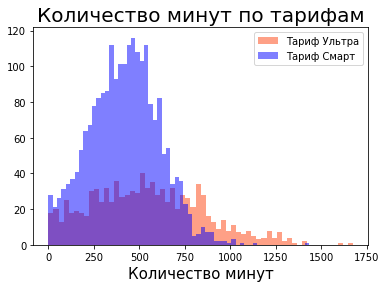

In [20]:
hist_construction(df_1 = 'calls_duration',
                  title_name = 'Количество минут по тарифам',
                  xlabel_name = 'Количество минут')
#применяем ранее написанную функцию

**Вывод:**
+ В среднем на тарифе "Смарт" люди тратят 419 минут на разговоры
+ На тарифе "Ультра" люди тратят в среднем 545 минут на разговоры

,mean,var,std
,messages_count,messages_count,messages_count
tariff,,,
smart,38.75,719.17,26.82
ultra,61.20,1999.57,44.72


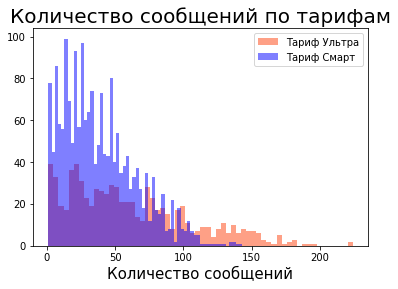

In [21]:
hist_construction(df_1 = 'messages_count',
                  title_name = 'Количество cообщений по тарифам',
                  xlabel_name = 'Количество сообщений')
#применяем ранее написанную функцию

**Вывод:**
+ В среднем на тарифе "Смарт" люди тратят 38 сообщений
+ На тарифе "Ультра" люди тратят в среднем 61 сообщение

,mean,var,std
,mb_count,mb_count,mb_count
tariff,,,
smart,16216.66,34427592.42,5867.50
ultra,19669.28,99571001.59,9978.53


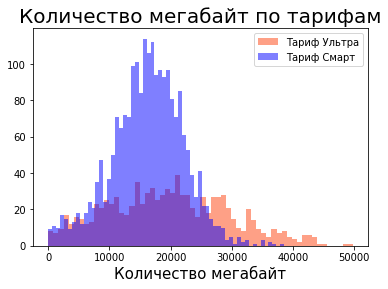

In [22]:
hist_construction(df_1 ='mb_count',
                  title_name = 'Количество мегабайт по тарифам',
                  xlabel_name = 'Количество мегабайт')
#применяем ранее написанную функцию

**Вывод:**
+ В среднем на тарифе "Смарт" люди тратят 17 гб на интернет
+ На тарифе "Ультра" люди тратят в среднем 20 гб на интернет

,mean,var,std
,revenue,revenue,revenue
tariff,,,
smart,1290.23,670847.14,819.05
ultra,2070.22,143149.85,378.35


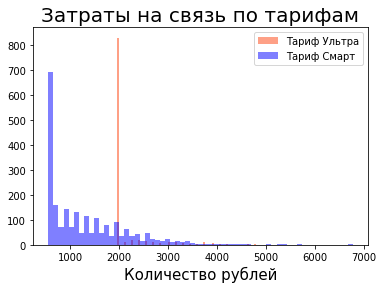

In [23]:
hist_construction(df_1 = 'revenue',
                  title_name = 'Затраты на связь по тарифам',
                  xlabel_name = 'Количество рублей')
#применяем ранее написанную функцию

**Вывод:**
+ На тарифе "Смарт" средняя суммы затраченой на связь составляет 1290 рублей
+ На тарифе "Ультра"  средние расходы на связь соствляют 2070 рублей

## Вывод

На графиках 'количество минут по тарифам' и 'количество мегабайт по тарифам' мы видим нормальное распределение, это говорит нам о том что чаще всего встречаются средние значения и близкие к нему. По гистограмме 'Количество сообщений по тарифам' и 'Затраты на связь по тарифам' видно, что это распределение Пуассона. 

В среднем на тарифе "Смарт" люди тратят 419 минут на разговоры, 38 сообщений и около 17 гб на интернет, средняя суммы затраченой на связь составляет 1290 рублей. Лимит включенного пакета составлет 500 минут на разговоры, 15 гб интернет трафика и 50 сообщений, стоимость тарифа 550 рублей. 

На тарифе "Ультра" люди тратят в среднем 545 минут на разговоры, 61 сообщение и около 20 гб на интернет, средние расходы на связь соствляют 2070 рублей, лимит включенного пакета составлет 3000 минут на разговоры, 30 гб интернет трафика и 1000 сообщений, стоимость тарифа 1950 рублей.

Исходя из наших результатов мы видим, что пользователи тарифа смарт, более чем в 2 раза больше стоимости своего пакета тратят на связь, при этом в среднем укладываются в пакет минут и сообщений, но выходят за рамки установленного пакета по интерету, приблизительно на 2 гб. Пользователи тарифа ультра в среденем тратят на связь около 2070 рубей, что примерно равно абонентской плате в 1950 рублей, при этом пользователи тарифа смарт обычно укладыватся в отведенный им пакет минут, сообщений и трафика.
С точки зрения компании, можно сделать вывод, что наиболее выгодным тарифом для компании является тариф Смарт, поскольку пользователи данного тарифа чаще выходят за рамки включенного пакета. Так же мы видим, что в настоящее время, пользователи редко пользуются смс сообщениями, это может быть связанно  с тем, что сейчас более развиты интернет мессенджеры.

# Шаг 4. Проверьте гипотезы
+ средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
+ средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

**Пороговое значение alpha задайте самостоятельно.**

**Поясните:**

+ как вы формулировали нулевую и альтернативную гипотезы;
+ какой критерий использовали для проверки гипотез и почему.

### 1. Сформулируем нулевую и альтернативную гипотезу и проверим их: 
+ ***'средняя выручка пользователей тарифов «Ультра» и «Смарт» равны'***  
(нулевая гипотеза)
+ ***'средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются'*** 
(альтернативная гипотеза)

Посчитаем среднее, дисперсию, стандартное отклонение, сумму по выручке между тарифами, в дальнейшем нам это понадобиться для проверки Гипотез и составления выводов. 

In [24]:
revenue_info = final_df.pivot_table(index='tariff',
                                  values='revenue',
                                  aggfunc=['mean', 'var', 'std', 'sum'])
display(revenue_info.round(2).head())

,mean,var,std,sum
,revenue,revenue,revenue,revenue
tariff,,,,
smart,1290.23,670847.14,819.05,2870751.0
ultra,2070.22,143149.85,378.35,1981200.0


Исходя из полученных результатов можно предварительно сказать, что средняя выручка отличается, проверим гипотезы. Поскольку дисперсия имеет значимую разницу добавим параметр equal_var=False.

In [25]:
ultra_revenue = df_ultra.revenue#выборка по выручке по тарифу ультра
smart_revenue = df_smart.revenue#выборка по выручке по тарифу смарт
alpha = .05 #задаем критический уровень статистической значимости
results = st.ttest_ind(ultra_revenue,
                       smart_revenue,
                       equal_var = False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу", 'Вывод: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются', sep='\n')
else:
    print("Не получилось отвергнуть нулевую гипотезу", 'Вывод: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны', sep='\n') 
#проверка двухсторонней гипотезы по взятым выборкам

p-значение:  2.796424815525196e-246
Отвергаем нулевую гипотезу
Вывод: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются


### 1.1 Вывод

Поскольку нулевая гипотеза всегда формулируется исходя из равенства, мы сформулировали ее по тому же принципу. В нашем случае оценив дисперсию из выборок, было принято решение использовать параметр **'equal_var=False'**, который при значении False считает не равными дисперсии выборок, значение критического уровеня статистической значимости мы задали 5%. Мы отвергаем нулевую гипотезу и делаем вывод, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Это можно предположить и по среднему двух выборок, они различаются между собой почти в два раза.

### 2. Сформулируем нулевую гипотезу и альтернативную гипотезы и проверим их: 
+ ***'средняя выручка пользователей из Москвы равна  выручке пользователей из других регионов'*** 
(нулевая гипотеза)
+ ***'средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов'***
(альтернативная гипотеза)

In [26]:
moscow_revenue = final_df.query("city == 'Москва'")
other_city_revenue = final_df.query("city != 'Москва'")
#выборка по городам
display(f'Дисперсия по Московской выручке равна: {round(moscow_revenue.revenue.var(), 2)}',
        f'Среднее по Московской выручке равно: {round(moscow_revenue.revenue.mean(), 2)}',
        f'Дисперсия по выручке остальных городов равна: {round(other_city_revenue.revenue.var(), 2)}',
        f'Среднее по выручке остальных городов равно: {round(other_city_revenue.revenue.mean(), 2)}')
#выводим дисперсию и среднее значение по двум выбокам

'Дисперсия по Московской выручке равна: 566297.76'

'Среднее по Московской выручке равно: 1546.05'

'Дисперсия по выручке остальных городов равна: 657612.41'

'Среднее по выручке остальных городов равно: 1519.77'

In [27]:

alpha = .05#задаем критический уровень статистической значимости
results = st.ttest_ind(moscow_revenue.revenue,
                       other_city_revenue.revenue,
                       equal_var = True)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу", 'Вывод: средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.', sep='\n')
else:
    print("Не получилось отвергнуть нулевую гипотезу", 'Вывод: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов', sep='\n') 
#проверка двухсторонней гипотезы по взятым выборкам

p-значение:  0.46586169582718384
Не получилось отвергнуть нулевую гипотезу
Вывод: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов


### 2.2 Вывод

Поскольку нулевая гипотеза всегда формулируется исходя из равенства, мы сформулировали ее по тому же принципу. В нашем случае оценив дисперсию из выборок, было принято решение использовать параметр 'equal_var=True', который при значении True считает равными дисперсии выборок(по умолчанию так и заданно), значение критического уровеня статистической значимости мы задали 5%. В данном случае у нас не получилось отвергнуть нулевую гипотезу, средняя выручка пользователей из Москвы равна выручке пользователей из других регионов, это можно предположить из среднего по выборкам, которые мы сделали ранее.

# Шаг 5. Напишите общий вывод

## Общий вывод

Проведя анализ данных компании "Мегалайн", можно сделать вывод, что выручка в Москве примерно равна выручке в других городах России, а средняя выручка тарифов Смарт и Ульра различаются. Так же исходя из данных построенных гистограм мы видим, что тариф Смарт более выгоден для компании, поскольку пользователи превышают лимит включенного пакета, за счет этого выручка по тарифу смарт выше более чем в 2 раза. 

В среднем на тарифе "Смарт" люди тратят 419 минут на разговоры, 38 сообщений и около 17 гб на интернет, средняя суммы затраченой на связь составляет 1290 рублей. Лимит включенного пакета составлет 500 минут на разговоры, 15 гб интернет трафика и 50 сообщений, стоимость тарифа 550 рублей.

На тарифе "Ультра" люди тратят в среднем 545 минут на разговоры, 61 сообщение и около 20 гб на интернет, средние расходы на связь соствляют 2070 рублей, лимит включенного пакета составлет 3000 минут на разговоры, 30 гб интернет трафика и 1000 сообщений, стоимость тарифа 1950 рублей.

Исходя из наших результатов мы видим, что пользователи тарифа смарт, более чем в 2 раза больше стоимости своего пакета тратят на связь, при этом в среднем укладываются в пакет минут и сообщений, но выходят за рамки установленного пакета по интерету, приблизительно на 2 гб. Пользователи тарифа ультра в среденем тратят на связь около 2070 рубей, что примерно равно абонентской плате в 1950 рублей, при этом пользователи тарифа смарт обычно укладыватся в отведенный им пакет минут, сообщений и трафика. С точки зрения компании, можно сделать вывод, что **наиболее перспективным тарифом для компании является тариф Смарт**, поскольку пользователи данного тарифа чаще выходят за рамки включенного пакета. Так же мы видим, что в настоящее время, пользователи редко пользуются смс сообщениями, это может быть связанно с тем, что сейчас более развиты интернет мессенджеры.